<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n20.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,60.278256,76.547819,47.634878,-2522.859436,-2328.398484,728.373058,-3056.771542
1,0.0,1.0,94.676254,26.247452,50.154901,-871.225394,-690.146787,-3298.975875,2608.829087
2,0.0,2.0,88.172991,36.015808,33.701472,-518.931402,-351.041130,-1618.905299,1267.864168
3,0.0,3.0,97.428584,59.817508,91.193760,-4342.505406,-4084.065555,-4566.751046,482.685490
4,0.0,4.0,34.637083,36.066430,23.899447,50.151146,154.754105,2115.390020,-1960.635914
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,96.486087,72.331927,90.963831,-4503.977825,-4234.195980,-2421.184399,-1813.011582
19996,999.0,16.0,65.781987,35.508857,45.975066,-872.151299,-714.885389,1317.414836,-2032.300226
19997,999.0,17.0,34.158442,24.826324,32.050295,695.509396,796.544455,2760.145740,-1963.601285
19998,999.0,18.0,76.414526,39.971627,40.705479,119.305623,286.397254,1081.779292,-795.382038


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,60.278256,76.547819,47.634878,-2522.859436,-2328.398484,728.373058,-3056.771542
1,0.0,1.0,94.676254,26.247452,50.154901,-871.225394,-690.146787,-3298.975875,2608.829087
2,0.0,2.0,88.172991,36.015808,33.701472,-518.931402,-351.041130,-1618.905299,1267.864168
3,0.0,3.0,97.428584,59.817508,91.193760,-4342.505406,-4084.065555,-4566.751046,482.685490
4,0.0,4.0,34.637083,36.066430,23.899447,50.151146,154.754105,2115.390020,-1960.635914
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,96.486087,72.331927,90.963831,-4503.977825,-4234.195980,-2421.184399,-1813.011582
19996,999.0,16.0,65.781987,35.508857,45.975066,-872.151299,-714.885389,1317.414836,-2032.300226
19997,999.0,17.0,34.158442,24.826324,32.050295,695.509396,796.544455,2760.145740,-1963.601285
19998,999.0,18.0,76.414526,39.971627,40.705479,119.305623,286.397254,1081.779292,-795.382038


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    60.278256  76.547819  ...   728.373058 -3056.771542
      1.0    94.676254  26.247452  ... -3298.975875  2608.829087
      2.0    88.172991  36.015808  ... -1618.905299  1267.864168
      3.0    97.428584  59.817508  ... -4566.751046   482.685490
      4.0    34.637083  36.066430  ...  2115.390020 -1960.635914
...                ...        ...  ...          ...          ...
999.0 15.0   96.486087  72.331927  ... -2421.184399 -1813.011582
      16.0   65.781987  35.508857  ...  1317.414836 -2032.300226
      17.0   34.158442  24.826324  ...  2760.145740 -1963.601285
      18.0   76.414526  39.971627  ...  1081.779292  -795.382038
      19.0   73.223513  49.789793  ...  -348.119988  5057.014750

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    60.278256  76.547819  ...   728.373058 -3056.771542
      1.0    94.676254  26.247452  ... -3298.975875  2608.829087
      2.0    88.172991  36.015808  ... -1618.905299  1267.864168
      3.0    97.428584  59.817508  ... -4566.751046   482.685490
      4.0    34.637083  36.066430  ...  2115.390020 -1960.635914
...                ...        ...  ...          ...          ...
999.0 15.0   96.486087  72.331927  ... -2421.184399 -1813.011582
      16.0   65.781987  35.508857  ...  1317.414836 -2032.300226
      17.0   34.158442  24.826324  ...  2760.145740 -1963.601285
      18.0   76.414526  39.971627  ...  1081.779292  -795.382038
      19.0   73.223513  49.789793  ...  -348.119988  5057.014750

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,60.278256,76.547819,47.634878,-2522.859436,-2328.398484,728.373058,-3056.771542
1,0.0,1.0,94.676254,26.247452,50.154901,-871.225394,-690.146787,-3298.975875,2608.829087
2,0.0,2.0,88.172991,36.015808,33.701472,-518.931402,-351.041130,-1618.905299,1267.864168
3,0.0,3.0,97.428584,59.817508,91.193760,-4342.505406,-4084.065555,-4566.751046,482.685490
4,0.0,4.0,34.637083,36.066430,23.899447,50.151146,154.754105,2115.390020,-1960.635914
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,96.486087,72.331927,90.963831,-4503.977825,-4234.195980,-2421.184399,-1813.011582
19996,999.0,16.0,65.781987,35.508857,45.975066,-872.151299,-714.885389,1317.414836,-2032.300226
19997,999.0,17.0,34.158442,24.826324,32.050295,695.509396,796.544455,2760.145740,-1963.601285
19998,999.0,18.0,76.414526,39.971627,40.705479,119.305623,286.397254,1081.779292,-795.382038


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    60.278256  76.547819  ...   728.373058 -3056.771542
      1.0    94.676254  26.247452  ... -3298.975875  2608.829087
      2.0    88.172991  36.015808  ... -1618.905299  1267.864168
      3.0    97.428584  59.817508  ... -4566.751046   482.685490
      4.0    34.637083  36.066430  ...  2115.390020 -1960.635914
...                ...        ...  ...          ...          ...
999.0 15.0   96.486087  72.331927  ... -2421.184399 -1813.011582
      16.0   65.781987  35.508857  ...  1317.414836 -2032.300226
      17.0   34.158442  24.826324  ...  2760.145740 -1963.601285
      18.0   76.414526  39.971627  ...  1081.779292  -795.382038
      19.0   73.223513  49.789793  ...  -348.119988  5057.014750

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

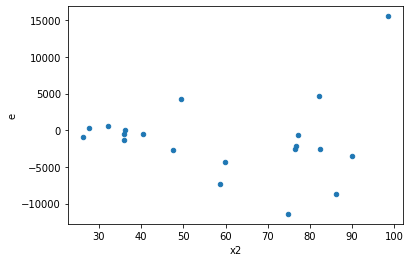

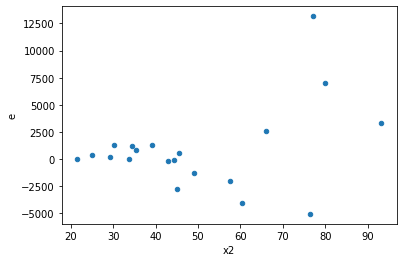

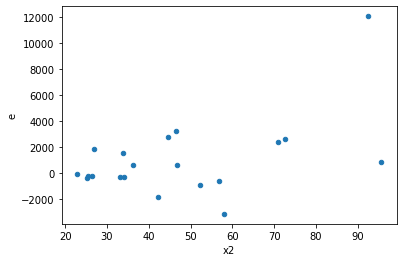

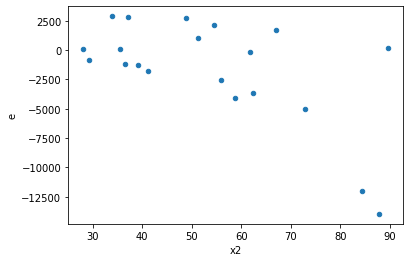

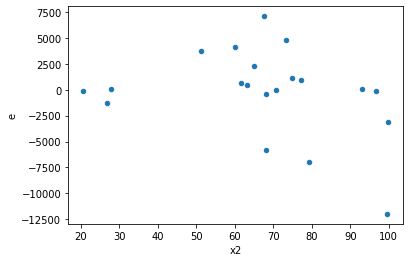

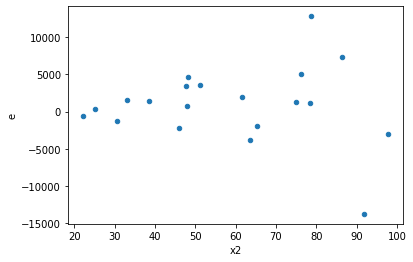

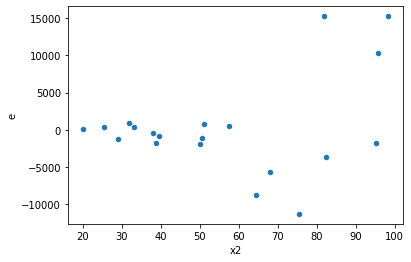

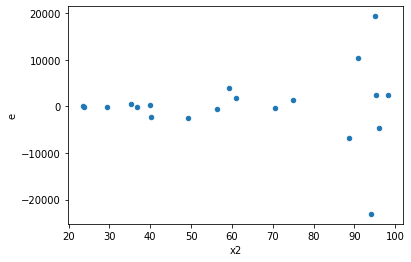

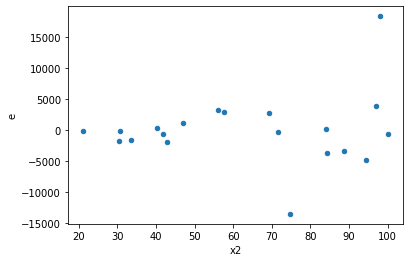

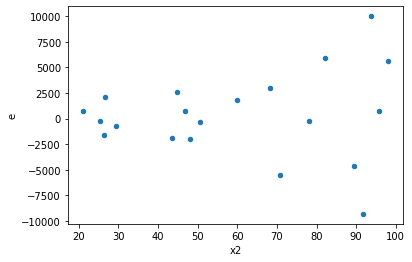

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,5.0,5.0,143492426.87356064,2558729.770545222,35873106.71839016,639682.4426363055,56.07955499067212,0.0004331379311797168,0.9997834310344101,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,173698138.9167829,1227370.8708589277,43424534.72919572,306842.71771473193,141.5204996638278,4.446955099290939e-05,0.9999777652245035,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,41305668.70254622,4941745.103500242,10326417.175636554,1235436.2758750606,8.358518668494128,0.03600713982921944,0.9819964300853903,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,87203858.1062554,8384382.345549729,21800964.52656385,2096095.5863874322,10.400749215896811,0.022470399151769405,0.9887648004241153,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,134960893.01905409,14779553.400714004,33740223.25476352,3694888.350178501,9.131594802623338,0.02980511955448728,0.9850974402227564,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,290312738.01543206,12283809.244840443,72578184.50385801,3070952.311210111,23.633771269882903,0.0034518018607354595,0.9982740990696323,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,182179400.22082007,3155590.387568454,45544850.05520502,788897.5968921134,57.73227125374746,0.0004035225478435933,0.9997982387260782,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,367482078.0636487,3252370.945378766,91870519.51591218,813092.7363446915,112.98898072675173,7.758491272191748e-05,0.999961207543639,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,279959961.8125603,2960635.218825712,69989990.45314008,740158.804706428,94.56077534725874,0.00012034911016867156,0.9999398254449157,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,143492426.87356064,2558729.770545222,35873106.71839016,639682.4426363055,56.07955499067212,0.0004331379311797168,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,173698138.9167829,1227370.8708589277,43424534.72919572,306842.71771473193,141.5204996638278,4.446955099290939e-05,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,41305668.70254622,4941745.103500242,10326417.175636554,1235436.2758750606,8.358518668494128,0.03600713982921944,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,87203858.1062554,8384382.345549729,21800964.52656385,2096095.5863874322,10.400749215896811,0.022470399151769405,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,134960893.01905409,14779553.400714004,33740223.25476352,3694888.350178501,9.131594802623338,0.02980511955448728,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,290312738.01543206,12283809.244840443,72578184.50385801,3070952.311210111,23.633771269882903,0.0034518018607354595,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,182179400.22082007,3155590.387568454,45544850.05520502,788897.5968921134,57.73227125374746,0.0004035225478435933,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,367482078.0636487,3252370.945378766,91870519.51591218,813092.7363446915,112.98898072675173,7.758491272191748e-05,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,279959961.8125603,2960635.218825712,69989990.45314008,740158.804706428,94.56077534725874,0.00012034911016867156,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    810
Reject005=1 : Homoscedasticity      190
Name: Result_test, dtype: int64